In [ ]:
import gdown
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pprint
import random
import pandas as pd
import pulp
import itertools
import requests
import random
from geopy.distance import geodesic
import time
import pandas as pd
import os

Downloading...
From (original): https://drive.google.com/uc?id=1zq17RENYLU1qrE2gNPsxRAPoysWMZAqf
From (redirected): https://drive.google.com/uc?id=1zq17RENYLU1qrE2gNPsxRAPoysWMZAqf&confirm=t&uuid=c3c33b3a-6764-4e35-8d55-41f18903d8be
To: /content/mpsis_setup.py
100%|██████████| 12.1k/12.1k [00:00<00:00, 9.08MB/s]


Mounted at /content/drive


In [ ]:
def generate_random_point(sw_lat, sw_lng, ne_lat, ne_lng):
    lat = random.uniform(sw_lat, ne_lat)
    lng = random.uniform(sw_lng, ne_lng)
    return lat, lng

def snap_to_road(lat, lng, api_key):
    url = f'https://roads.googleapis.com/v1/nearestRoads?points={lat},{lng}&key={api_key}'
    response = requests.get(url)
    data = response.json()
    if 'snappedPoints' in data and len(data['snappedPoints']) > 0:
        snapped_point = data['snappedPoints'][0]['location']
        return snapped_point['latitude'], snapped_point['longitude']
    return None

def get_road_distance_time(origin, destination, api_key):
    origin_str = f'{origin[0]}, {origin[1]}'
    destination_str = f'{destination[0]}, {destination[1]}'
    departure_time = int(time.time()) + 24 * 3600
    url = (
        f'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&origins={origin_str}'
        f'&destinations={destination_str}&mode=driving&departure_time={departure_time}&key={API_KEY}'
    )
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        element = data['rows'][0]['elements'][0]
        if element['status'] == 'OK':
            distance = element['distance']['text']
            duration = element['duration']['text']
            return distance, duration
        else:
            return None, None
    else:
        return None, None

def find_center(sw_lat, sw_lng, ne_lat, ne_lng):
    center_lat = (sw_lat + ne_lat) / 2
    center_lng = (sw_lng + ne_lng) / 2
    return center_lat, center_lng

def generate_list(n, target_sum):
    if n <= 1:
        raise ValueError("The length of the list must be greater than 1.")
    if target_sum < 0:
        raise ValueError("The target sum must be non-negative.")
    result = [0]
    random_values = np.random.rand(n - 1)
    random_values *= target_sum / np.sum(random_values)
    rounded_values = np.round(random_values, 2)
    difference = target_sum - np.sum(rounded_values)

    if len(rounded_values) > 0:
        rounded_values[-1] += difference

    result.extend(rounded_values)

    return result

In [ ]:
real_distance_columns = [col for col in df.columns if col.startswith('Real Distance to Point')]
df_filtered = df[real_distance_columns]

num_points = len(df_filtered)
cost = [[0] * num_points for _ in range(num_points)]

for i in range(num_points):
    for j in range(num_points):
        if i != j:
            column_name = f'Real Distance to Point {j + 1}'
            distance = df_filtered.iloc[i][column_name].replace(",", "").replace(" km", "").replace(" m", "")
            cost[i][j] = int(float(distance)*100)
print("Cost matrix:")
for row in cost:
    print(f"{row},")

Cost matrix:
[0, 324, 181, 281, 241, 204, 411, 248, 65, 167, 206, 204, 296, 218, 314, 264, 224, 268, 327, 101, 362, 360, 365, 326, 59, 245, 134, 287, 247, 300, 308, 329, 290, 210, 316, 277, 164, 171, 395, 353, 247, 292, 382, 290, 280, 350, 108, 417, 74, 214, 229, 231, 14, 143, 89, 187, 398, 122, 345, 171, 199, 289, 115, 284, 344, 386, 231, 187, 254, 186, 127, 291, 87, 271, 245, 218, 243, 165, 206, 178, 343, 231, 180, 81, 206, 81, 194, 190, 250, 321, 379, 126, 244, 221, 278, 235, 429, 80, 357, 198],
[324, 0, 501, 362, 450, 526, 564, 88, 372, 416, 204, 450, 389, 538, 450, 565, 357, 235, 484, 342, 138, 390, 556, 8, 346, 564, 432, 459, 553, 179, 36, 653, 235, 463, 640, 107, 162, 254, 118, 678, 570, 347, 437, 459, 447, 665, 374, 589, 259, 219, 545, 483, 333, 442, 235, 451, 586, 325, 605, 469, 519, 158, 441, 585, 265, 552, 380, 362, 463, 314, 229, 124, 309, 578, 130, 399, 565, 394, 357, 293, 277, 528, 345, 345, 164, 400, 479, 252, 451, 12, 140, 220, 412, 371, 580, 559, 753, 246, 51, 162],
[1

In [ ]:
def crop_matrix(data, N):
    return [row[:N] for row in data[:N]]

In [ ]:
nof_vechicles = [1,2,4,5,10]

In [ ]:
variables_1 = [[] for _ in range(5)]
constraints_1 = [[] for _ in range(5)]

for m in nof_vechicles:
  print(f"number of vechicles {m}")
  which_list_to_add = nof_vechicles.index(m)
  for i in range(5,101):
    print(f"number of clients {i}")
    cost_function = []

    cost_shiffted = crop_matrix(cost,i)

    number_of_clients = i - 1
    Q = 100

    d = generate_list(number_of_clients + 1, 0.5 * Q * m)
    p = generate_list(number_of_clients + 1, 0.5 * Q * m)

    vrpsdp = 0
    vrpsdp = pulp.LpProblem("VRPSDP", pulp.LpMinimize)

    x = pulp.LpVariable.dicts("x", [(i, j, k) for i in range(number_of_clients+1) for j in range(number_of_clients+1) for k in range(m)], cat='Binary')
    y = pulp.LpVariable.dicts("y", [(i, j) for i in range(number_of_clients+1) for j in range(number_of_clients+1)], lowBound=0, cat='Continuous')
    z = pulp.LpVariable.dicts("z", [(i, j) for i in range(number_of_clients+1) for j in range(number_of_clients+1)], lowBound=0, cat='Continuous')

    vrpsdp += pulp.lpSum(cost_shiffted[i][j] * x[i, j, k] for k in range(m) for i in range(number_of_clients+1) for j in range(number_of_clients+1) if i != j)

    for j in range(1, number_of_clients+1):
        vrpsdp += pulp.lpSum(x[i, j, k] for k in range(m) for i in range(number_of_clients+1) if i != j) == 1

    for k in range(m):
      for j in range(number_of_clients+1):
        vrpsdp += pulp.lpSum(x[i,j,k] for i in range(number_of_clients+1)) - pulp.lpSum(x[j,i,k] for i in range(number_of_clients+1)) == 0

    for k in range(m):
      vrpsdp += pulp.lpSum(x[0,j,k] for j in range(1, number_of_clients+1)) == 1


    for j in range(1, number_of_clients+1):
      vrpsdp += pulp.lpSum(y[j,i] for i in range(number_of_clients+1)) - pulp.lpSum(y[i,j] for i in range(number_of_clients+1)) == p[j]

    for j in range(1, number_of_clients+1):
      vrpsdp += pulp.lpSum(z[i,j] for i in range(number_of_clients+1)) - pulp.lpSum(z[j,i] for i in range(number_of_clients+1)) == d[j]

    for i in range(number_of_clients+1):
      for j in range(number_of_clients+1):
        if i != j:
          vrpsdp += y[i,j] + z[i,j] <= Q * pulp.lpSum(x[i,j,k] for k in range(m))

    vrpsdp += pulp.lpSum(x[0,j,k] for j in range(1, number_of_clients+1) for k in range(m)) == m
    for i in range(1,number_of_clients+1):
      vrpsdp += pulp.lpSum(x[i,j,k] for j in range(number_of_clients+1) for k in range(m) if i != j) == 1

    variables_1[which_list_to_add].append(len(vrpsdp.variables()))
    constraints_1[which_list_to_add].append(len(vrpsdp.constraints))


number of vechicles 1
number of clients 5
number of clients 6
number of clients 7
number of clients 8
number of clients 9
number of clients 10
number of clients 11
number of clients 12
number of clients 13
number of clients 14
number of clients 15
number of clients 16
number of clients 17
number of clients 18
number of clients 19
number of clients 20
number of clients 21
number of clients 22
number of clients 23
number of clients 24
number of clients 25
number of clients 26
number of clients 27
number of clients 28
number of clients 29
number of clients 30
number of clients 31
number of clients 32
number of clients 33
number of clients 34
number of clients 35
number of clients 36
number of clients 37
number of clients 38
number of clients 39
number of clients 40
number of clients 41
number of clients 42
number of clients 43
number of clients 44
number of clients 45
number of clients 46
number of clients 47
number of clients 48
number of clients 49
number of clients 50
number of clients

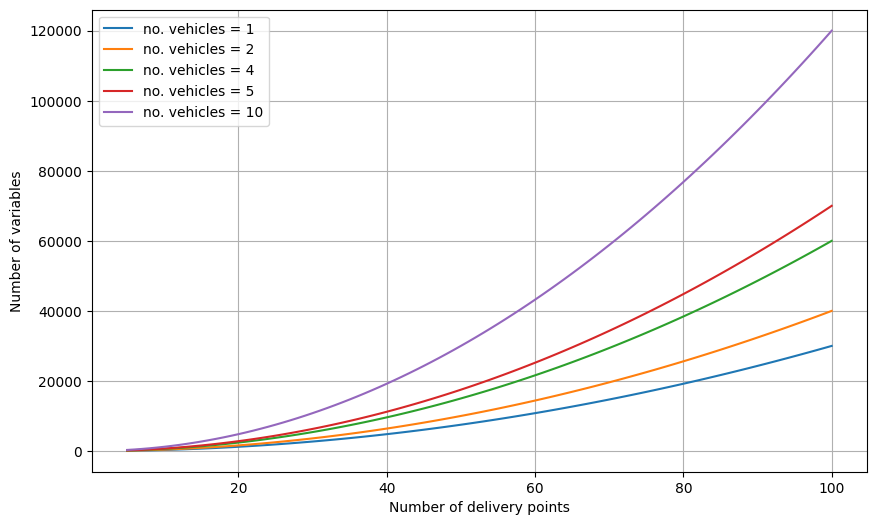

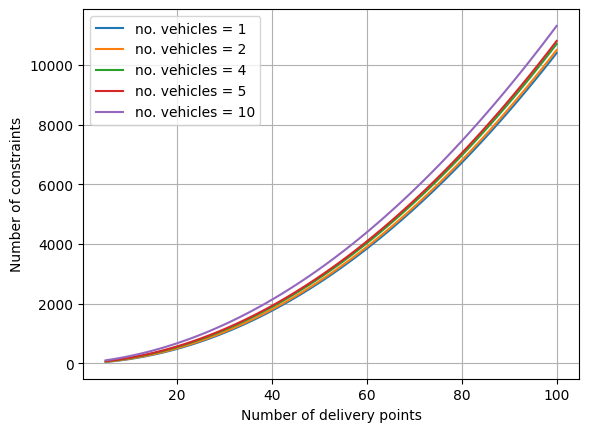

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(5, 100, 96)

nof_vehicles = [1, 2, 4, 5, 10]


plt.figure(figsize=(10, 6))

for idx, data in enumerate(variables_1):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}')

plt.xlabel('Number of delivery points')
plt.ylabel('Number of variables')
plt.legend()
plt.grid(True)

plt.show()

for idx, data in enumerate(constraints_1):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}')

plt.xlabel('Number of delivery points')
plt.ylabel('Number of constraints')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
variables_2 = [[] for _ in range(5)]
constraints_2 = [[] for _ in range(5)]

for number_of_vehicles in nof_vechicles:
  print(f"%%%%%%%%%%%%%%%%%%%%% number of vechicles {number_of_vehicles}")
  which_list_to_add = nof_vechicles.index(number_of_vehicles)
  for i in range(5,101):
    print(f"number of clients {i}")
    number_of_clients = i -1
    capacity_of_vehicle = 100
    cost_shiffted = crop_matrix(cost, i)
    demand_of_client = generate_list(number_of_clients + 1, 0.9 * capacity_of_vehicle * number_of_vehicles)

    problem = pulp.LpProblem("CVRP", pulp.LpMinimize)

    x = [[[pulp.LpVariable(f"x{i}_{j},{k}", cat="Binary") if i != j else None
          for k in range(number_of_vehicles)]
          for j in range(number_of_clients + 1)]
        for i in range(number_of_clients + 1)]
    u = pulp.LpVariable.dicts("u", range(1, number_of_clients + 1), 0, number_of_clients, cat="Continuous")

    problem += pulp.lpSum(cost_shiffted[i][j] * x[i][j][k] if i != j else 0
                          for k in range(number_of_vehicles)
                          for j in range(number_of_clients + 1)
                          for i in range(number_of_clients + 1))

    for j in range(1, number_of_clients + 1):
        problem += pulp.lpSum(x[i][j][k] if i != j else 0
                              for i in range(number_of_clients + 1)
                              for k in range(number_of_vehicles)) == 1

    for k in range(number_of_vehicles):
        problem += pulp.lpSum(x[0][j][k] for j in range(1, number_of_clients + 1)) == 1
        problem += pulp.lpSum(x[i][0][k] for i in range(1, number_of_clients + 1)) == 1

    for k in range(number_of_vehicles):
        for j in range(number_of_clients + 1):
            problem += pulp.lpSum(x[i][j][k] if i != j else 0
                                  for i in range(number_of_clients + 1)) - \
                      pulp.lpSum(x[j][i][k] for i in range(number_of_clients + 1)) == 0

    for k in range(number_of_vehicles):
        problem += pulp.lpSum(demand_of_client[j] * x[i][j][k] if i != j else 0
                              for i in range(number_of_clients + 1)
                              for j in range(1, number_of_clients + 1)) <= capacity_of_vehicle

    for i in range(1, number_of_clients + 1):
        for j in range(1, number_of_clients + 1):
            if i != j:
                for k in range(number_of_vehicles):
                    problem += u[i] - u[j] + (number_of_clients * x[i][j][k]) <= number_of_clients - 1

    variables_2[which_list_to_add].append(len(problem.variables()))
    constraints_2[which_list_to_add].append(len(problem.constraints))

%%%%%%%%%%%%%%%%%%%%% number of vechicles 1
number of clients 5
number of clients 6
number of clients 7
number of clients 8
number of clients 9
number of clients 10
number of clients 11
number of clients 12
number of clients 13
number of clients 14
number of clients 15
number of clients 16
number of clients 17
number of clients 18
number of clients 19
number of clients 20
number of clients 21
number of clients 22
number of clients 23
number of clients 24
number of clients 25
number of clients 26
number of clients 27
number of clients 28
number of clients 29
number of clients 30
number of clients 31
number of clients 32
number of clients 33
number of clients 34
number of clients 35
number of clients 36
number of clients 37
number of clients 38
number of clients 39
number of clients 40
number of clients 41
number of clients 42
number of clients 43
number of clients 44
number of clients 45
number of clients 46
number of clients 47
number of clients 48
number of clients 49
number of client

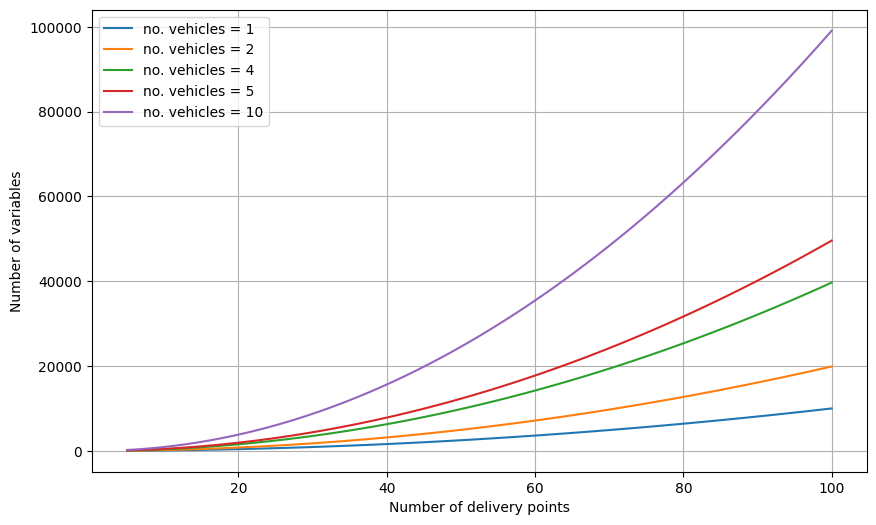

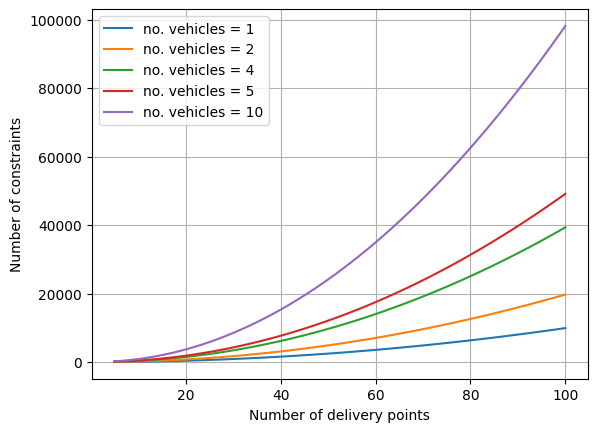

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(5, 100, 96)

nof_vehicles = [1, 2, 4, 5, 10]

plt.figure(figsize=(10, 6))

for idx, data in enumerate(variables_2):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}')

plt.xlabel('Number of delivery points')
plt.ylabel('Number of variables')
plt.legend()
plt.grid(True)

plt.show()

for idx, data in enumerate(constraints_2):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}')

plt.xlabel('Number of delivery points')
plt.ylabel('Number of constraints')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import math
variables_3 = [[] for _ in range(5)]
constraints_3 = [[] for _ in range(5)]

nof_vechicles = [1,2,4,5,10]


for K in nof_vechicles:
  print(f"%%%%%%%%%%%% number of vechicles {K}")
  which_list_to_add = nof_vechicles.index(K)

  for i in range(5,101):
    print(f"number of clients {i}")
    number_of_clients = i-1

    L_B = list(range(1, number_of_clients + 1))
    SOURCE = 0
    cybant = math.floor(number_of_clients*0.1)

    midpoint = number_of_clients - cybant
    L = L_B[:midpoint]
    L0 = L[:]
    L0.insert(0,0)
    B = L_B[midpoint:]
    B0 = B[:]
    B0.insert(0,0)
    Cu = L_B
    V = list(range(0, number_of_clients + 1))
    Q = 100

    D = generate_list(len(L) + 1, 0.5 * Q * K)

    for buffor in range(cybant):
      D.append(1)

    Kl = K
    Kb = K
    cost_shiffted = crop_matrix(cost,i)

    s = pulp.LpVariable.dicts('s', [(i, j) for i in V for j in V if i != j], cat = pulp.LpBinary)
    e = pulp.LpVariable.dicts('e', [(i, j) for i in L for j in B0 if i != j], cat = pulp.LpBinary)
    l = pulp.LpVariable.dicts('l', [(i, j) for i in V for j in V if i != j], 0, cat = "Continuous")

    vrpb = pulp.LpProblem("vehicle_routing", pulp.LpMinimize)

    cost_function_model = pulp.lpSum(s[i,j] * cost_shiffted[i][j] for i in V for j in V if i != j) + pulp.lpSum(e[i,j] * cost[i][j] for i in L for j in B0 if i != j)
    vrpb += cost_function_model

    vrpb += pulp.lpSum(s[i,j] for i in L0 for j in L if i != j) == len(L)

    for j in L:
      vrpb += pulp.lpSum(l[i,j] for i in L0 if i != j) - pulp.lpSum(l[j,k] for k in L0 if k != j) == D[j]

    for j in L:
      vrpb += pulp.lpSum(s[i,j] for i in L0 if i != j) == 1

    for j in L:
      vrpb += pulp.lpSum(s[j,k] for k in L if k != j) + pulp.lpSum(e[j,k] for k in B0 if k != j)  ==  pulp.lpSum(s[(i,j)] for i in L0 if i != j)

    for j in L:
      for i in L0:
        if i != j:
          vrpb += l[(i,j)] <= Q * s[(i,j)]

    fraaction7 = pulp.lpSum(D[j] for j in L)/Q
    vrpb += pulp.lpSum(s[0,j] for j in L) >= max(float(fraaction7.value()),Kl)

    vrpb += pulp.lpSum(s[i,j] for i in B for j in B0 if i != j) == len(B)

    for j in B:
      vrpb += pulp.lpSum(l[i,j] for i in B if i != j) - pulp.lpSum(l[(j,k)] for k in B0 if k != j) == -D[j]

    for j in B:
      vrpb += pulp.lpSum(s[j,i] for i in B0 if j != i) == 1

    for j in B:
      vrpb += pulp.lpSum(s[k,j] for k in B if k != j) + pulp.lpSum(e[k,j] for k in L) == pulp.lpSum(s[(j,i)] for i in B0 if j != i)

    for j in B0:
      for i in B:
        if i != j:
          vrpb += l[i,j] <= Q * s[i,j]

    fraaction13 = pulp.lpSum(D[j] for j in B)/Q
    vrpb += max(int(fraaction13.value()),Kb) <= pulp.lpSum(s[i,0] for i in B)
    vrpb += pulp.lpSum(s[(i,0)] for i in B) <= pulp.lpSum(s[0, j] for j in L)

    vrpb += pulp.lpSum(s[i,0] for i in B) + pulp.lpSum(e[i, 0] for i in L) == pulp.lpSum(s[0,j] for j in L)

    for i in V:
      for j in V:
        if i != j:
          vrpb += s[i,j] + s[j,i] <= 1


    vrpb += pulp.lpSum(s[i,j] for i in B for j in L if i != j) == 0

    vrpb += pulp.lpSum(s[0, j] for j in B) == 0

    vrpb += pulp.lpSum(s[i,j] for i in L for j in B0 if i != j) == 0

    variables_3[which_list_to_add].append(len(vrpb.variables()))
    constraints_3[which_list_to_add].append(len(vrpb.constraints))

%%%%%%%%%%%% number of vechicles 1
number of clients 5
number of clients 6
number of clients 7
number of clients 8
number of clients 9
number of clients 10
number of clients 11
number of clients 12
number of clients 13
number of clients 14
number of clients 15
number of clients 16
number of clients 17
number of clients 18
number of clients 19
number of clients 20
number of clients 21
number of clients 22
number of clients 23
number of clients 24
number of clients 25
number of clients 26
number of clients 27
number of clients 28
number of clients 29
number of clients 30
number of clients 31
number of clients 32
number of clients 33
number of clients 34
number of clients 35
number of clients 36
number of clients 37
number of clients 38
number of clients 39
number of clients 40
number of clients 41
number of clients 42
number of clients 43
number of clients 44
number of clients 45
number of clients 46
number of clients 47
number of clients 48
number of clients 49
number of clients 50
numb

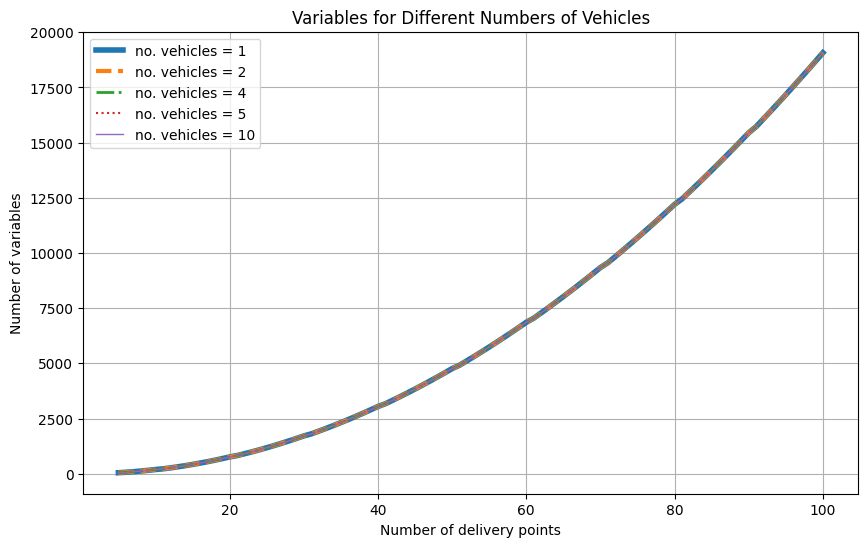

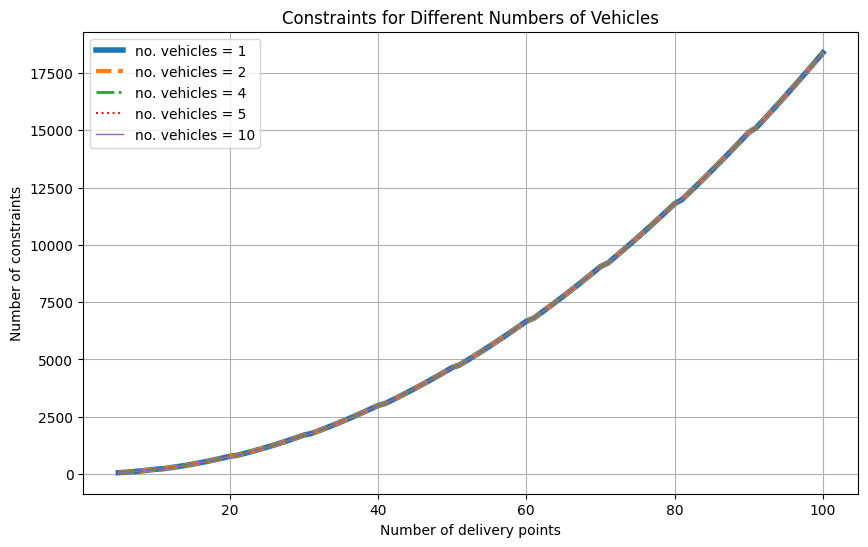

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(5, 100, 96)

nof_vehicles = [1, 2, 4, 5, 10]

line_styles = ['-', '--', '-.', ':', '-']
line_widths = [4, 3, 2, 1.5, 1]

plt.figure(figsize=(10, 6))

for idx, data in enumerate(variables_3):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}', linestyle=line_styles[idx], linewidth=line_widths[idx])

plt.xlabel('Number of delivery points')
plt.ylabel('Number of variables')
plt.title('Variables for Different Numbers of Vehicles')
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))

for idx, data in enumerate(constraints_3):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}', linestyle=line_styles[idx], linewidth=line_widths[idx])

plt.xlabel('Number of delivery points')
plt.ylabel('Number of constraints')
plt.title('Constraints for Different Numbers of Vehicles')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
variables_4 = [[] for _ in range(5)]
constraints_4 = [[] for _ in range(5)]

for c in nof_vechicles:
  print(f"%%%%%%%%%%%% number of vechicles {c}")
  which_list_to_add = nof_vechicles.index(c)

  for i in range(5,101):
    print(f"number of clients {i}")
    n = i -1
    Q = 100
    M = 100000000

    d =  generate_list(n + 1, 0.5 * Q * c)
    t = [1] * (n + 1)
    cost_shiffted = crop_matrix(cost,i)

    cost_shiffted.append(cost_shiffted[0])

    iterator = 0
    for row in cost_shiffted:
      cost_shiffted[iterator].append(cost_shiffted[iterator][0])
      iterator += 1

    a = [0] * (n + 1)
    b = [M] * (n + 1)

    prob = pulp.LpProblem("VRPTW", pulp.LpMinimize)

    x = pulp.LpVariable.dicts("x", [(i,j,k) for i in range(n+1) for j in range(1, n+2) for k in range(c)], cat='Binary')
    s = pulp.LpVariable.dicts("s", [(i,k) for i in range(n+2) for k in range(c)], lowBound=0, cat='Continuous')

    prob += pulp.lpSum(cost_shiffted[i][j] * x[(i,j,k)] for i in range(n+1) for j in range(1, n+2) for k in range(c))

    for j in range(1, n+1):
        prob += pulp.lpSum(x[(i,j,k)] for i in range(n+1) for k in range(c)) == 1

    for i in range(1, n+1):
        prob += pulp.lpSum(x[(i,j,k)] for j in range(1, n+2) for k in range(c)) == 1

    for k in range(c):
        prob += pulp.lpSum(x[i,n+1,k] for i in range(n+1)) == 1

    for k in range(c):
        prob += pulp.lpSum(x[0,j,k] for j in range(1, n+2)) == 1

    for m in range(1, n+1):
      for k in range(c):
        prob += pulp.lpSum(x[(i,m,k)] for i in range(n+1) if i != m) == pulp.lpSum(x[(m,j,k)] for j in range(1,n+2) if j != m)

    for k in range(c):
      prob += x[0,n+1,k] == 0

    for i in range(n+1):
      for j in range(1,n+2):
        for k in range(c):
          if i == j:
            prob += x[(i,j,k)] == 0

    for i in range(n+1):
      for j in range(1,n+2):
        for k in range(c):
          prob += s[(i,k)] + t[i] + cost_shiffted[i][j] <= s[(j,k)] + M*(1 - x[(i,j,k)])

    for i in range(1, n+1):
      for k in range(c):
        prob += M*(pulp.lpSum(x[i,j,k] for j in range(1,n+2)) - 1) + a[i] <= s[(i,k)]

    for i in range(1, n+1):
      for k in range(c):
        prob += s[(i,k)] + t[i] <= b[i] + M*(1 - pulp.lpSum(x[(i,j,k)] for j in range(1,n+2)))

    variables_4[which_list_to_add].append(len(prob.variables()))
    constraints_4[which_list_to_add].append(len(prob.constraints))

%%%%%%%%%%%% number of vechicles 1
number of clients 5
number of clients 6
number of clients 7
number of clients 8
number of clients 9
number of clients 10
number of clients 11
number of clients 12
number of clients 13
number of clients 14
number of clients 15
number of clients 16
number of clients 17
number of clients 18
number of clients 19
number of clients 20
number of clients 21
number of clients 22
number of clients 23
number of clients 24
number of clients 25
number of clients 26
number of clients 27
number of clients 28
number of clients 29
number of clients 30
number of clients 31
number of clients 32
number of clients 33
number of clients 34
number of clients 35
number of clients 36
number of clients 37
number of clients 38
number of clients 39
number of clients 40
number of clients 41
number of clients 42
number of clients 43
number of clients 44
number of clients 45
number of clients 46
number of clients 47
number of clients 48
number of clients 49
number of clients 50
numb

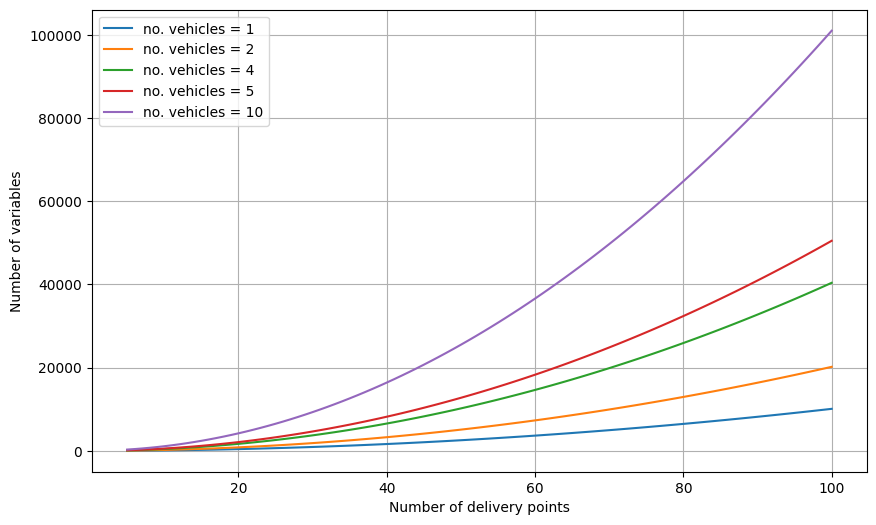

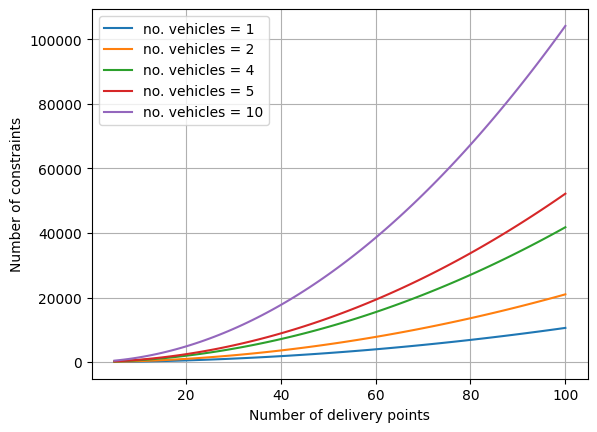

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(5, 100, 96)

nof_vehicles = [1, 2, 4, 5, 10]

plt.figure(figsize=(10, 6))

for idx, data in enumerate(variables_4):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}')

plt.xlabel('Number of delivery points')
plt.ylabel('Number of variables')
plt.legend()
plt.grid(True)

plt.show()

for idx, data in enumerate(constraints_4):
    plt.plot(x_values, data, label=f'no. vehicles = {nof_vehicles[idx]}')

plt.xlabel('Number of delivery points')
plt.ylabel('Number of constraints')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
vechicles = [1,5,10]
clients = [20-5,40-5,100-5]

for v in vechicles:
  for c in clients:

    var = nof_vechicles.index(v)
    print(f"%%%%%%%% Values for {v} vechicle and {c} clients")

    print(f"{variables_2[var][c]} ____ {constraints_2[var][c]}")
    print(f"{variables_4[var][c]} ____ {constraints_4[var][c]}")
    print(f"{variables_3[var][c]} ____ {constraints_3[var][c]}")
    print(f"{variables_1[var][c]} ____ {constraints_1[var][c]}")

%%%%%%%% Values for 1 vechicle and 15 clients
399 ____ 384
421 ____ 517
759 ____ 771
1198 ____ 478
%%%%%%%% Values for 1 vechicle and 35 clients
1599 ____ 1564
1641 ____ 1837
3045 ____ 2991
4798 ____ 1758
%%%%%%%% Values for 1 vechicle and 95 clients
9999 ____ 9904
10101 ____ 10597
19071 ____ 18387
29998 ____ 10398
%%%%%%%% Values for 5 vechicle and 15 clients
1919 ____ 1844
2105 ____ 2433
759 ____ 771
2798 ____ 562
%%%%%%%% Values for 5 vechicle and 35 clients
7839 ____ 7664
8205 ____ 8873
3045 ____ 2991
11198 ____ 1922
%%%%%%%% Values for 5 vechicle and 95 clients
49599 ____ 49124
50505 ____ 52193
19071 ____ 18387
69998 ____ 10802
%%%%%%%% Values for 10 vechicle and 15 clients
3819 ____ 3669
4210 ____ 4828
759 ____ 771
4798 ____ 667
%%%%%%%% Values for 10 vechicle and 35 clients
15639 ____ 15289
16410 ____ 17668
3045 ____ 2991
19198 ____ 2127
%%%%%%%% Values for 10 vechicle and 95 clients
99099 ____ 98149
101010 ____ 104188
19071 ____ 18387
119998 ____ 11307
